<a href="https://colab.research.google.com/github/GreenOrange44/AIR/blob/main/HandsOn/K-nearestClassification/K_nearestClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

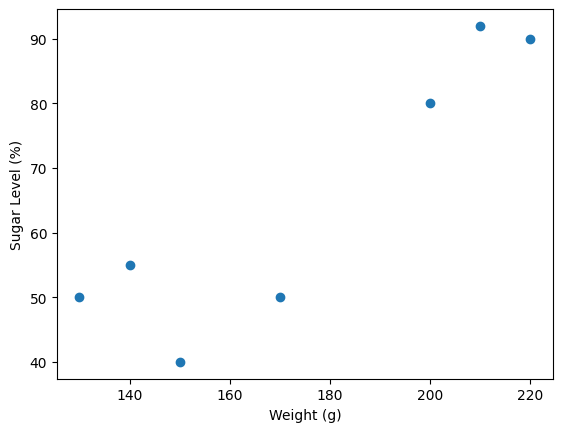

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt


# Create a simple fruit dataset
# Each row represents a fruit: [weight (g), sugar level (%)]
X = np.array([[150, 40], [170, 50], [130, 50], [140, 55], [200, 80], [210, 92],[220, 90]])


X

plt.scatter(X[:, 0], X[:, 1])


# Set labels for the axes
plt.xlabel('Weight (g)')
plt.ylabel('Sugar Level (%)')


# Display the plot
plt.show()


In [ ]:
# Create corresponding labels: 0 for apple, 1 for orange
Y = np.array([0, 0, 0, 0, 1, 1, 1])

# Create a KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier with our fruit data
knn.fit(X, Y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Now let's classify a new fruit: 160g weight, 40 sugar level
test_fruit = np.array([160, 40]).reshape(1, -1)
fruit_prediction = knn.predict(test_fruit)


if fruit_prediction[0] == 0:
    print("The predicted fruit is an apple")
else:
    print("The predicted fruit is an orange")



test_fruit = np.array([210, 95]).reshape(1, -1)
fruit_prediction = knn.predict(test_fruit)

if fruit_prediction[0] == 0:
    print("The predicted fruit is an apple")
else:
    print("The predicted fruit is an orange")

The predicted fruit is an apple
The predicted fruit is an orange


In [ ]:
#Without sklearn

#to learn how it is working



import numpy as np
from collections import Counter


# The dataset
X = np.array([[150, 40], [170, 50], [130, 50], [140, 55], [200, 80], [210, 92],[220, 90]])
Y = np.array([0, 0, 0, 0, 1, 1, 1])


# Function for calculating euclidean distance
def euclidean_distance(a, b):
    distance = 0
    for ai, bi in zip(a, b):
        distance += (ai - bi) ** 2
    distance = distance ** 0.5
    return distance




def predict(X, Y, test_point, k):
    # Calculate distances between the test point and all other points
    distances = [euclidean_distance(X[i], test_point) for i in range(len(X))]
    print("distances",distances)
    # Combine the distances and targets, sort the distances, and select the k closest points
    sorted_distances = np.argsort(distances)[:k]
    print("sorted_distances",sorted_distances)
    # Get the labels of the k nearest neighbor points
    k_nearest_labels = [Y[i] for i in sorted_distances]
    print("k_nearest_labels",k_nearest_labels)
    # Return the most common label among the k nearest neighbors
    return Counter(k_nearest_labels).most_common(1)[0][0]


# Test the function
test_fruit = np.array([250, 90])
fruit_prediction = predict(X, Y, test_fruit, k=3)


if fruit_prediction == 0:
    print("The predicted fruit is an apple")
else:
    print("The predicted fruit is an orange")




In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# Load iris dataset which contains data(sepal and petal length and width) and target(0 for setosa, 1 for virginaca)
iris = datasets.load_iris()


# Create feature and target arrays
X = iris.data
y = iris.target


print(iris)

X.shape


y.shape


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

(150,)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




X_train.shape




y_train.shape




X_test.shape


y_test.shape


(30,)

In [ ]:
# Create a KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)




# Train the classifier with the training data
knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict the labels for the test data
y_pred = knn.predict(X_test)




# Print the accuracy of the classifier
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))




from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred)
print(report)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

